In [45]:
import os

import arviz as az
import numpy as np
import pandas as pd
import xarray

from matplotlib import pyplot as plt


RESULTS_DIR = os.path.join("results", "runs")
MODEL_NANE = "mean_model"
posterior_file = os.path.join(RESULTS_DIR, MODEL_NANE, "posterior.nc")

od = np.array([1, 60, 50, 100])

posterior = az.from_netcdf(posterior_file)

def posterior_predictive_dist(od: np.array)->np.ndarray:
    assert od.shape.__len__() == 1, 'od array is not 1 dimentional'

    od = od.flatten() # has no effect arary is already flat

    beta1 = posterior.posterior['beta1'].values.reshape(-1, 1)
    beta2 = posterior.posterior['beta2'].values.reshape(-1, 1)

    return beta1 + beta2 * od

def test_posterior_predictive_dist():
    test_od = np.array([1, 60, 50, 100])
    result = posterior_predictive_dist(test_od)

    assert result.shape[1] == 4, 'predictions results have the wrong shape. Wrong number of columns.'

test_posterior_predictive_dist()

In [43]:
od.shape.

array([[  1,  60],
       [ 50, 100]])

In [23]:

pred_mean = cdw_pred.mean(axis=0)
pred_std = cdw_pred.std(axis=0)

<ErrorbarContainer object of 3 artists>

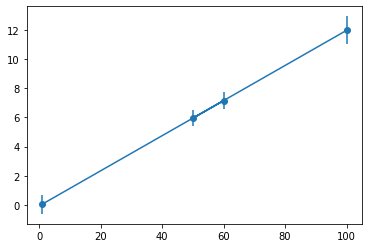

In [26]:
plt.scatter(x=od, y=pred_mean)
plt.errorbar(x=od, y=pred_mean, yerr=2*pred_std)